In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/OnlineRetail.csv', encoding="ISO-8859-1")

# Preprocess the dataset to remove datetime column
df = df.drop(columns=["InvoiceDate"])

# Create the RFM table
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # create new column for total price
rfmTable = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'TotalPrice': 'sum', 'Quantity': 'sum'})
rfmTable.rename(columns={'InvoiceNo': 'Frequency', 'TotalPrice': 'MonetaryValue', 'Quantity': 'Recency'}, inplace=True)

# Apply K-means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(rfmTable)

# Get the silhouette score for 3 clusters
score_3 = silhouette_score(rfmTable, kmeans_3.labels_)
print("Silhouette score for 3 clusters:", score_3)

# Apply K-means clustering with 6 clusters
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(rfmTable)

# Get the silhouette score for 6 clusters
score_6 = silhouette_score(rfmTable, kmeans_6.labels_)
print("Silhouette score for 6 clusters:", score_6)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 3 clusters: 0.963671555447458


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.8065979602909165


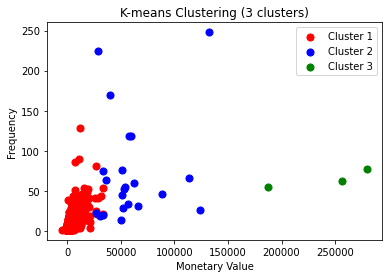

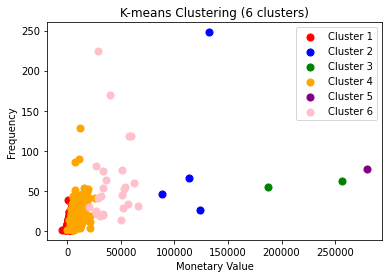

In [ ]:
# Plot the clusters for 3 clusters
plt.scatter(rfmTable[kmeans_3.labels_ == 0]['MonetaryValue'], rfmTable[kmeans_3.labels_ == 0]['Frequency'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(rfmTable[kmeans_3.labels_ == 1]['MonetaryValue'], rfmTable[kmeans_3.labels_ == 1]['Frequency'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(rfmTable[kmeans_3.labels_ == 2]['MonetaryValue'], rfmTable[kmeans_3.labels_ == 2]['Frequency'], s = 50, c = 'green', label = 'Cluster 3')
plt.title('K-means Clustering (3 clusters)')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the clusters for 6 clusters
plt.scatter(rfmTable[kmeans_6.labels_ == 0]['MonetaryValue'], rfmTable[kmeans_6.labels_ == 0]['Frequency'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(rfmTable[kmeans_6.labels_ == 1]['MonetaryValue'], rfmTable[kmeans_6.labels_ == 1]['Frequency'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(rfmTable[kmeans_6.labels_ == 2]['MonetaryValue'], rfmTable[kmeans_6.labels_ == 2]['Frequency'], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(rfmTable[kmeans_6.labels_ == 3]['MonetaryValue'], rfmTable[kmeans_6.labels_ == 3]['Frequency'], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(rfmTable[kmeans_6.labels_ == 4]['MonetaryValue'], rfmTable[kmeans_6.labels_ == 4]['Frequency'], s = 50, c = 'purple', label = 'Cluster 5')
plt.scatter(rfmTable[kmeans_6.labels_ == 5]['MonetaryValue'], rfmTable[kmeans_6.labels_ == 5]['Frequency'], s = 50, c = 'pink', label = 'Cluster 6')
plt.title('K-means Clustering (6 clusters)')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()